## **Comparison of Simple Blockchain with new Proposed, Consortium Blockchain**


In [1]:
import hashlib
import json
from time import time

In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import time as tm

class SimpleBlockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.nodes = set()
        self.tax_rate = 0.05  # Example tax rate (5%)

        # Load the blockchain from a file
        self.load_blockchain()

        # If the blockchain is empty (first run), create the genesis block
        if not self.chain:
            self.new_block(previous_hash="1", proof=100)

    def register_node(self, node):
        self.nodes.add(node)

    def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        # Reset the current list of transactions
        self.current_transactions = []
        self.chain.append(block)

        # Save the blockchain to a file
        self.save_blockchain()
        return block

    def new_transaction(self, sender, recipient, amount, sender_currency, recipient_currency):
        # Simulate currency exchange rate (in reality, you'd fetch this from a reliable source)
        exchange_rate_inr_to_usd = 0.014  # 1 INR = 0.014 USD
        # Convert the amount to recipient's currency
        converted_amount = amount * exchange_rate_inr_to_usd
        transaction = {
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
            'sender_currency': sender_currency,
            'recipient_currency': recipient_currency,
            'converted_amount': converted_amount,
            'tax': self.calculate_tax(converted_amount),
        }
        self.current_transactions.append(transaction)
        return self.last_block['index'] + 1

    @property
    def last_block(self):
        return self.chain[-1] if self.chain else None

    def calculate_tax(self, amount):
        return round(amount * self.tax_rate, 2)

    @staticmethod
    def hash(block):
        return hashlib.sha256(json.dumps(block, sort_keys=True).encode()).hexdigest()

    def valid_chain(self, chain):
        previous_block = chain[0]
        current_index = 1
        while current_index < len(chain):
            block = chain[current_index]
            if block['previous_hash'] != self.hash(previous_block):
                return False
            previous_block = block
            current_index += 1
        return True

    def proof_of_work(self, last_proof):
        proof = 0
        while self.valid_proof(last_proof, proof) is False:
            proof += 1
        simple_proof_end_time = time()
        return proof

    @staticmethod
    def valid_proof(last_proof, proof):
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

    def mine_block(self):
        # Traditional mining using proof-of-work
        last_block = self.last_block
        last_proof = last_block['proof']
        # Find the proof that satisfies the proof-of-work condition
        proof = self.proof_of_work(last_proof)
        # Create the new block with the found proof
        new_block = self.new_block(proof, self.hash(last_block))
        return new_block

    def reach_consensus(self):
        # The node with the longest valid chain is considered authoritative
        neighbors = self.nodes
        new_chain = None
        # Initialize the length of the current chain
        max_length = len(self.chain)
        # Check chains from all nodes
        for node in neighbors:
            # response = requests.get(f'http://{node}/chain')
            tm.sleep(0.2)
            response = 200;
            if response == 200:
                length = 0 # default value
                chain = [] # default value
                # Check if the length is longer and the chain is valid
                if length > max_length and self.valid_chain(chain):
                    max_length = length
                    new_chain = chain
        # Replace our chain if we discovered a new, valid chain longer than ours
        if new_chain:
            self.chain = new_chain
            return True
        return False

    def save_blockchain(self):
        try:
            # Specify the path to the Google Drive folder where you want to save the file
            file_path = '/content/drive/MyDrive/simple_blockchain.txt'
            with open(file_path, 'w') as file:
                json.dump(self.chain, file, indent=2)
        except Exception as e:
            print(f"Error saving simple blockchain to file: {str(e)}")

    def load_blockchain(self):
        try:
            with open('blockchain.txt', 'r') as file:
                data = file.read()
                if data:
                    self.chain = json.loads(data)
        except Exception as e:
            print(f"Error loading blockchain from file: {str(e)}")

In [4]:
# Create an instance of the blockchain
simple_blockchain = SimpleBlockchain()

# Register nodes
simple_blockchain.register_node("http://node1")
simple_blockchain.register_node("http://node2")
simple_blockchain.register_node("http://node3")

# Mine the first block (genesis block is already created in the constructor)
simple_blockchain.mine_block()

# Add transactions and mine additional blocks
for _ in range(4):
    # Example transactions
    sender = "Alice"
    recipient = "Bob"
    amount = 10
    sender_currency = "USD"
    recipient_currency = "EUR"

    # Add a new transaction to the current_transactions list
    simple_blockchain.new_transaction(sender, recipient, amount, sender_currency, recipient_currency)

    # Mine a new block
    mined_block = simple_blockchain.mine_block()

    # Print information about the mined block
    print(f"\tBlock #{mined_block['index'] - 1} mined")

    # Attempt to reach consensus after mining each block
    if simple_blockchain.reach_consensus():
        print("Consensus reached. Chain updated.")
    else:
        print("Consensus not reached. Chain unchanged.")

# Validate the entire blockchain
print("\nIs the blockchain valid?", simple_blockchain.valid_chain(simple_blockchain.chain))

Error loading blockchain from file: [Errno 2] No such file or directory: 'blockchain.txt'
	Block #2 mined
Consensus not reached. Chain unchanged.
	Block #3 mined
Consensus not reached. Chain unchanged.
	Block #4 mined
Consensus not reached. Chain unchanged.
	Block #5 mined
Consensus not reached. Chain unchanged.

Is the blockchain valid? True


In [5]:
# Print the entire blockchain
print("\nSimple Blockchain:")
print(json.dumps(simple_blockchain.chain, indent=2))


Simple Blockchain:
[
  {
    "index": 1,
    "timestamp": 1700019684.641782,
    "transactions": [],
    "proof": 100,
    "previous_hash": "1"
  },
  {
    "index": 2,
    "timestamp": 1700019685.1983526,
    "transactions": [],
    "proof": 35293,
    "previous_hash": "a11869179805be29e48255631f93f9a1dc06cacdf6b42c2a531b2658f0102075"
  },
  {
    "index": 3,
    "timestamp": 1700019685.2554965,
    "transactions": [
      {
        "sender": "Alice",
        "recipient": "Bob",
        "amount": 10,
        "sender_currency": "USD",
        "recipient_currency": "EUR",
        "converted_amount": 0.14,
        "tax": 0.01
      }
    ],
    "proof": 35089,
    "previous_hash": "b9610d52fb4921c11c446348a1568d2f4874c498e38f9be5a092d29bee03a86e"
  },
  {
    "index": 4,
    "timestamp": 1700019686.021076,
    "transactions": [
      {
        "sender": "Alice",
        "recipient": "Bob",
        "amount": 10,
        "sender_currency": "USD",
        "recipient_currency": "EUR",
     

In [6]:
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00


In [7]:
from Crypto.PublicKey import RSA
from Crypto.Signature import pkcs1_15
from Crypto.Hash import SHA256
import base64
import hashlib

class ProposedBlockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.nodes = set()
        self.supernodes = set()
        self.tax_rate = 0.05

        # Create the genesis block
        self.new_block(previous_hash="1", proof=100)

    def register_node(self, node, supernode=False):
        if supernode:
            self.supernodes.add(node)
        else:
            self.nodes.add(node)

    def proof_of_work(self, last_proof):
        proof = 0
        while self.valid_proof(last_proof, proof) is False:
            proof += 1
        return proof

    @staticmethod
    def valid_proof(last_proof, proof):
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

    def new_block(self, proof, previous_hash=None, miner_address=None, signature=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
            'miner_address': miner_address,
            'signature': signature,
        }

        # Reset the current list of transactions
        self.current_transactions = []
        self.chain.append(block)
        return block

    def new_transaction(self, sender, recipient, amount, sender_currency, recipient_currency):
        exchange_rate_inr_to_usd = 0.014  # 1 INR = 0.014 USD

        # Convert the amount to recipient's currency
        converted_amount = amount * exchange_rate_inr_to_usd

        transaction = {
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
            'sender_currency': sender_currency,
            'recipient_currency': recipient_currency,
            'converted_amount': converted_amount,
            'tax': self.calculate_tax(converted_amount),
        }
        self.current_transactions.append(transaction)
        return self.last_block['index'] + 1

    @property
    def last_block(self):
        return self.chain[-1] if self.chain else None

    def calculate_tax(self, amount):
        return round(amount * self.tax_rate, 2)

    @staticmethod
    def hash(block):
        return hashlib.sha256(json.dumps(block, sort_keys=True).encode()).hexdigest()

    def sign_block(self, private_key):
        # Sign the current block with the private key
        block = self.last_block
        block_string = json.dumps(block, sort_keys=True).encode()
        private_key = RSA.import_key(private_key)
        signature = pkcs1_15.new(private_key).sign(SHA256.new(block_string))
        return signature

    def verify_signature(self, public_key, signature, block):
        # Verify the signature of a block using the public key
        block_string = json.dumps(block, sort_keys=True).encode()
        public_key = RSA.import_key(public_key)
        try:
            pkcs1_15.new(public_key).verify(SHA256.new(block_string), signature)
            return True
        except (ValueError, TypeError):
            return False

    def mine_block(self, miner_address, miner_private_key, isSuperNode=True):
        # Proposed mining for an asymmetric consortium blockchain
        last_block = self.last_block
        last_proof = last_block['proof']

        if isSuperNode == True:
          # modified proof of work
          proof = self.proof_of_work(last_proof)
          signature = self.sign_block(miner_private_key)
          signature_str = base64.b64encode(signature).decode('utf-8')
          new_block = self.new_block(proof, self.hash(last_block), miner_address, signature_str)
        else:
          # standard proof of work
          proof = self.proof_of_work(last_proof)
          new_block = self.new_block(proof, self.hash(last_block))
        return new_block

    def reach_consensus(self):
        neighbors = self.supernodes
        new_chain = None
        max_length = len(self.chain)

        for node in neighbors:
            # response = requests.get(f'http://{node}/chain')
            tm.sleep(0.2)
            response = 200;
            if response == 200:
                length = 0
                chain = []
                if length > max_length and self.valid_chain(chain):
                    max_length = length
                    new_chain = chain

        if new_chain:
            self.chain = new_chain
            return True

        return False

    def valid_chain(self, chain):
        previous_block = chain[0]
        current_index = 1

        while current_index < len(chain):
            block = chain[current_index]

            if block['previous_hash'] != self.hash(previous_block):
                return False

            previous_block = block
            current_index += 1

        return True

In [8]:
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import rsa

def generate_miner_details():
    # Generate an RSA key pair
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
    )
    # Get the public key in OpenSSH format
    public_key = private_key.public_key()
    pem = public_key.public_bytes(
        encoding=serialization.Encoding.OpenSSH,
        format=serialization.PublicFormat.OpenSSH
    )
    # Convert bytes to string for printing
    public_key_str = pem.decode('utf-8')
    # Get the private key in PEM format
    private_pem = private_key.private_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PrivateFormat.PKCS8,
        encryption_algorithm=serialization.NoEncryption()
    )
    # Convert bytes to string for printing
    private_key_str = private_pem.decode('utf-8')
    # print(f"Public Key:\n{public_key_str}")
    # print(f"\nPrivate Key:\n{private_key_str}")
    return public_key_str, private_key_str

In [9]:
# Create an instance of the blockchain
proposed_blockchain = ProposedBlockchain()

# Register nodes
proposed_blockchain.register_node("http://node1")
proposed_blockchain.register_node("http://node2")
proposed_blockchain.register_node("http://node3", supernode=True)

miner_address, miner_private_key = generate_miner_details()

# Mine the first block (genesis block is already created in the constructor)
proposed_blockchain.mine_block(miner_address, miner_private_key, isSuperNode=True)

# Add transactions and mine additional blocks
for i in range(4):
    # Example transactions
    sender = "Alice"
    recipient = "Bob"
    amount = 10
    sender_currency = "USD"
    recipient_currency = "EUR"

    # Add a new transaction to the current_transactions list
    proposed_blockchain.new_transaction(sender, recipient, amount, sender_currency, recipient_currency)

    # Mine a new block
    miner_address, miner_private_key = generate_miner_details()
    mined_block = proposed_blockchain.mine_block(miner_address, miner_private_key, isSuperNode=False)

    # Print information about the mined block
    print(f"\tBlock #{mined_block['index'] - 1} mined")

    # Attempt to reach consensus after mining each block
    if proposed_blockchain.reach_consensus():
        print("Consensus reached. Chain updated.")
    else:
        print("Consensus not reached. Chain unchanged.")

# Validate the entire blockchain
print("\nIs the blockchain valid?", proposed_blockchain.valid_chain(simple_blockchain.chain))

	Block #2 mined
Consensus not reached. Chain unchanged.
	Block #3 mined
Consensus not reached. Chain unchanged.
	Block #4 mined
Consensus not reached. Chain unchanged.
	Block #5 mined
Consensus not reached. Chain unchanged.

Is the blockchain valid? True


In [10]:
import statistics
def avg(times):
  return statistics.mean(times)

In [11]:
# Performance measurement for the Simple Blockchain
test_cases = 5
traditional = []

while test_cases > 0:
    traditional_times = []
    sample_size = 100
    while sample_size > 0:
        start_time_traditional = time()

        # add a transaction to traditional blockchain
        simple_blockchain.new_transaction("Cyril", "Cyrus", 1000, "NPR", "INR")

        # Mine a new block and reach consensus
        simple_blockchain.mine_block()
        simple_blockchain.reach_consensus()

        end_time_traditional = time()
        traditional_time = end_time_traditional - start_time_traditional
        traditional_times.append(traditional_time)
        sample_size = sample_size - 1
    print(traditional_times)
    traditional_mean_time = avg(traditional_times)
    traditional.append(traditional_mean_time)
    test_cases = test_cases - 1
print("\nfinal dataset: ")
print(traditional)

[0.8426949977874756, 0.7321751117706299, 0.8256950378417969, 0.7561826705932617, 0.6574621200561523, 0.6794438362121582, 0.7027444839477539, 0.8289544582366943, 0.6319782733917236, 0.6436042785644531, 0.6265017986297607, 0.8814926147460938, 0.6097493171691895, 0.6505377292633057, 0.7116432189941406, 0.6673157215118408, 0.6705315113067627, 0.7426626682281494, 0.8278789520263672, 1.029550552368164, 0.9057843685150146, 0.914675235748291, 0.6627597808837891, 1.776235580444336, 0.7564208507537842, 0.8685872554779053, 0.7499973773956299, 1.2876579761505127, 1.1063902378082275, 0.7244389057159424, 0.6903295516967773, 0.623690128326416, 0.6196987628936768, 0.6987619400024414, 0.6454529762268066, 0.8639645576477051, 0.6471090316772461, 0.6516256332397461, 0.6233682632446289, 0.7819557189941406, 0.6132533550262451, 0.6747457981109619, 0.633246898651123, 0.7518846988677979, 0.7435686588287354, 0.7668006420135498, 0.746746301651001, 0.7364602088928223, 0.6471970081329346, 0.6462099552154541, 0.609

In [12]:
# Performance measurement for the Proposed Blockchain
test_cases = 5
proposed = []

miner_address, miner_private_key = generate_miner_details()

while test_cases > 0:
    proposed_times = []
    sample_size = 100
    while sample_size > 0:
        start_time_proposed = time()

        # Add one transaction to proposed blockchain
        proposed_blockchain.new_transaction("Cyrus", "Cyril", 1000, "INR", "NPR")

        # Mine a new block
        if(test_cases % 2 == 0):
          proposed_blockchain.mine_block(miner_address, miner_private_key, isSuperNode=True)
        else:
          proposed_blockchain.mine_block(miner_address, miner_private_key, isSuperNode=False)
        proposed_blockchain.reach_consensus()

        end_time_proposed = time()
        proposed_time = end_time_proposed - start_time_proposed
        proposed_times.append(proposed_time)
        sample_size = sample_size - 1
    print(proposed_times)
    proposed_mean_time = avg(proposed_times)
    proposed.append(proposed_mean_time)
    test_cases = test_cases - 1
print("\nfinal dataset: ")
print(proposed)

[0.3219928741455078, 0.2729671001434326, 0.2935032844543457, 0.279569149017334, 0.257354736328125, 0.2745516300201416, 0.30104708671569824, 0.4080219268798828, 0.2270646095275879, 0.23825621604919434, 0.22401881217956543, 0.49131298065185547, 0.20520424842834473, 0.23809814453125, 0.2995748519897461, 0.27213144302368164, 0.2627756595611572, 0.24190998077392578, 0.2558441162109375, 0.3258507251739502, 0.2539560794830322, 0.2722039222717285, 0.20734429359436035, 0.3957252502441406, 0.25063204765319824, 0.33191990852355957, 0.2818295955657959, 0.7770161628723145, 1.199793815612793, 0.4308128356933594, 0.3713035583496094, 0.23640799522399902, 0.22912311553955078, 0.3843071460723877, 0.2843780517578125, 0.6259868144989014, 0.24203085899353027, 0.24443745613098145, 0.20775198936462402, 0.2881150245666504, 0.20339751243591309, 0.22593975067138672, 0.22029542922973633, 0.323744535446167, 0.3286247253417969, 0.3630540370941162, 0.33939456939697266, 0.32616662979125977, 0.24021100997924805, 0.23

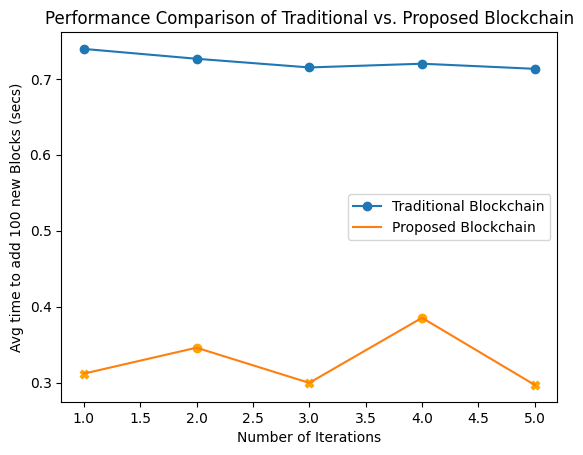

In [13]:
import matplotlib.pyplot as plt

time_points = range(1, 6)
plt.plot(time_points, traditional, label='Traditional Blockchain', marker='o')
plt.plot(time_points, proposed, label='Proposed Blockchain')
# Plot Proposed Blockchain with different markers for odd and even points
for i, (x, y) in enumerate(zip(time_points, proposed)):
    marker = 'X' if i % 2 == 0 else 'o'
    plt.scatter(x, y, label=None, marker=marker, color='orange')

# Adding labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Avg time to add 100 new Blocks (secs)')
plt.title('Performance Comparison of Traditional vs. Proposed Blockchain')

# Adding legend
plt.legend()

# Display the plot
plt.show()